In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer, StandardScaler, minmax_scale
pd.options.display.max_rows = 100

In [2]:
df = pd.read_csv('Data_Marketing_Customer_Analysis_Round3.csv')


In [21]:
#splitting the dataframe

num_df = df.select_dtypes(include=[np.number])
num_df.head(10)

cat_df = df.select_dtypes(exclude=[np.number])
cat_df.describe()

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
count,10689,10689,10689,10689,10689,10689,10689,10689,10689,10689,10689,10689,10689,10689,10689,10689
unique,4,2,3,5,59,2,5,2,3,3,3,9,4,4,6,3
top,west region,no,basic,bachelor,1/27/11,jan,employed,f,suburban,married,personal auto,personal l3,offer1,agent,four-door car,medsize
freq,3678,9316,6523,3210,236,5684,6658,5469,6742,6199,7937,4006,4394,4019,5424,7528


In [11]:
#cat_df_encoded = pd.get_dummies(cat_df, drop_first=True)

In [12]:
cat_df_encoded.head()

,region_east,region_north west,region_west region,response_yes,coverage_extended,coverage_premium,education_college,education_doctor,education_high school or below,education_master,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,0,1,0,1,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [22]:
cat_df['education'].unique()

array(['college', 'bachelor', 'high school or below', 'doctor', 'master'],
      dtype=object)

In [26]:
   education_map = {"high school or below":0, "college":1, "bachelor":1, "master":2, "doctor":3}
   cat_df["education"] = cat_df["education"].replace(education_map)

In [27]:
 cat_df["education"].unique()

array([1, 0, 3, 2])

In [32]:
cat_df.replace({'offer1':1, 'offer2':2, 'offer3':3, 'offer4':4}, inplace=True)

In [33]:
cat_df.replace({'small':0, 'medsize':1, 'large':2}, inplace=True)

In [34]:
cat_df_encoded = pd.get_dummies(cat_df, drop_first=True)

In [49]:
varA = num_df['income']
varB = num_df['customer_lifetime_value']

In [41]:
scaler = MinMaxScaler()
scaler.fit(num_df[['income']])

MinMaxScaler()

In [50]:
num_df['income_scaled'] = scaler.transform(num_df[['income']])
#varA_scaled = minmax_scale(varA)

In [43]:
num_df['income_scaled']

0        0.422396
1        0.914158
2        0.134550
3        0.434059
4        0.151628
           ...   
10684    0.572623
10685    0.568231
10686    0.331317
10687    0.602130
10688    0.654907
Name: income_scaled, Length: 10689, dtype: float64

<AxesSubplot:xlabel='income_scaled', ylabel='Count'>

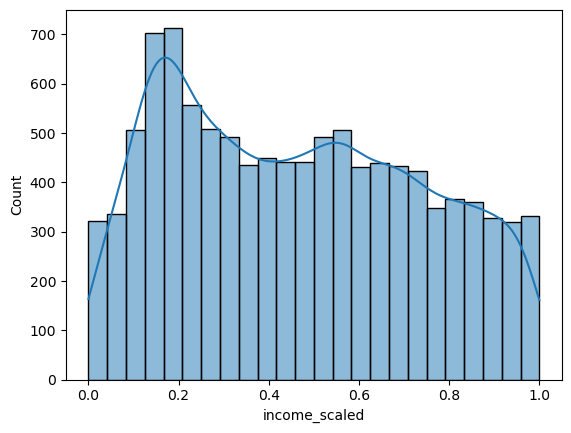

In [44]:
sns.histplot(data=num_df, x='income_scaled', kde=True)


In [ ]:
varB = num_df['customer_lifetime_value']

In [59]:
scaler_standard = StandardScaler()
scaler_standard.fit(num_df[['customer_lifetime_value']])

StandardScaler()

In [70]:
num_df['customer_lifetime_value_scaled_standard'] = scaler_standard.transform(num_df[['customer_lifetime_value']])
num_df['customer_lifetime_value_scaled_standard'].describe().round()


count    10689.0
mean         0.0
std          1.0
min         -1.0
25%         -1.0
50%         -0.0
75%          0.0
max         11.0
Name: customer_lifetime_value_scaled_standard, dtype: float64

In [63]:
pt = PowerTransformer
pt = PowerTransformer(method='yeo-johnson') 
pt.fit(num_df[['customer_lifetime_value']])

PowerTransformer()

In [64]:
num_df['customer_lifetime_value_pt'] = pt.transform(num_df[['customer_lifetime_value']])

In [69]:
num_df['customer_lifetime_value_pt'].describe().round()

count    10689.0
mean         0.0
std          1.0
min         -2.0
25%         -1.0
50%         -0.0
75%          1.0
max          3.0
Name: customer_lifetime_value_pt, dtype: float64

<AxesSubplot:xlabel='customer_lifetime_value_pt', ylabel='Count'>

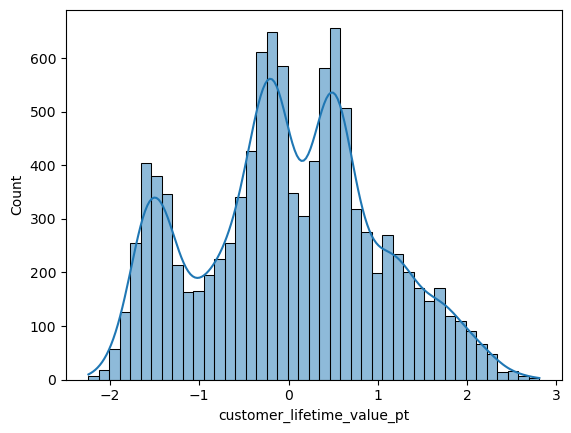

In [66]:
sns.histplot(data=num_df, x='customer_lifetime_value_pt', kde=True)
